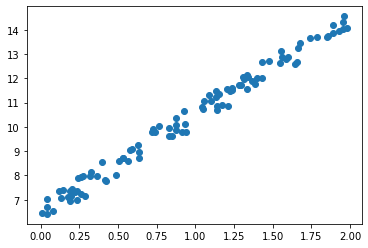

In [13]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
x = 2 * np.random.rand(100,1)
y = 6+4*x+np.random.rand(100,1)

plt.scatter(x,y)

In [4]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

In [5]:
def get_weight_updates(w1, w0, x, y, learning_rate=0.01):
    N = len(y)
    
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    y_pred = np.dot(x, w1.T) + w0
    diff = y - y_pred
    
    w0_factors = np.ones((N,1))
    
    w1_update = -(2/N)*learning_rate*(np.dot(x.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [6]:
def gradient_descent_steps(x, y, iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, x, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [19]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

start = time.time()
w1, w0 = gradient_descent_steps(x, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * x + w0
print('Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))
end = time.time()
print('Calculation Time is : {0:.4f}'.format(end - start))

w1:4.028 w0:6.490
Gradient Descent Total Cost: 0.0775
Calculation Time is : 0.0230


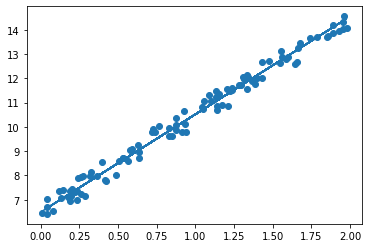

In [8]:
plt.scatter(x,y)
plt.plot(x, y_pred)

In [9]:
def stochastic_gradient_descent_steps(x, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        
        stochastic_random_index = np.random.permutation(x.shape[0])
        sample_x = x[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        w1_update, w0_update = get_weight_updates(w1, w0, sample_x, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [18]:
start = time.time()
w1, w0 = stochastic_gradient_descent_steps(x, y, iters=1000)
print("w1:", round(w1[0,0],3), "w0:", round(w0[0,0],3))
y_pred = w1[0,0] * x + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))
end = time.time()
print('Calculation Time is : {0:.4f}'.format(end - start))

w1: 4.031 w0: 6.486
Stochastic Gradient Descent Total Cost:0.0777
Calculation Time is : 0.0450
